<h1>1960 Election</h1>
<ul>
    <li>Republican Candidate - Richard Nixon</li>
    <li>Democratic Candidate - John F. Kennedy</li>
</ul>

In [45]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']


# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, name1, name2, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)
           
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    # Get ordered list
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)
    

    #Reverse the list because barh plots items from the bottom
    return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
        
# Now populate two lists    
debateArr = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/september-26-1960-debate-transcript/', "kennedy:", "nixon:", ['smith:', 'vanocur:', 'novins:', 'warren:', 'fleming:'])
debateArr2 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-7-1960-debate-transcript/', "kennedy:", "nixon:", ['mcgee:', 'nivem:', 'morgan:', 'spivak:', 'levy:'])
debateArr3 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-13-1960-debate-transcript/', "kennedy:", "nixon:", ['shadel:', 'mcgee:', 'fremd:', 'cater:', 'drummond:'])
debateArr4 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-21-1960-debate-transcript/', "kennedy:", "nixon:", ['howe:', 'singiser:', 'cronkite:', 'chancellor:'])

total_debate_arr_1 = {}
total_debate_arr_2 = {}

for key, value in debateArr[0][0]:
    total_debate_arr_1[key] = value

for key, value in debateArr2[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value

for key, value in debateArr3[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value
        
for key, value in debateArr4[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value    
        
        
for key, value in debateArr[1][0]:
    total_debate_arr_2[key] = value

for key, value in debateArr2[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value

for key, value in debateArr3[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value
        
for key, value in debateArr4[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value   
        
total_arr1 = sorted (total_debate_arr_1 .items(), key = operator.itemgetter(1), reverse=True)
total_ml1 = min(len(total_arr1),30)

total_arr2 = sorted (total_debate_arr_2 .items(), key = operator.itemgetter(1), reverse=True)
total_ml2 = min(len(total_arr2),30)

print(total_arr1)
print(total_arr2)

[('think', 109), ('united', 108), ('states', 104), ('believe', 81), ('president', 79), ('going', 61), ('we’re', 54), ('years', 49), ('nixon', 48), ('us', 48), ('country', 47), ('world', 42), ('people', 41), ('last', 36), ('want', 31), ('america', 27), ('latin', 27), ('freedom', 26), ('administration', 26), ('it’s', 25), ('countries', 24), ('islands', 24), ('bill', 23), ('two', 23), ('economic', 22), ('meet', 21), ('make', 21), ('dollars', 20), ('say', 20), ('formosa', 20), ('security', 18), ('castro', 16), ('social', 15), ('question', 15), ('treaty', 15), ('africa', 15), ('federal', 14), ('first', 14), ('strength', 13), ('voted', 12), ('house', 12), ('government', 12), ('europe', 12), ('around', 12), ('communists', 12), ('senate', 11), ('general', 11), ('that’s', 11), ('judgment', 11), ('may', 11), ('must', 11), ('many', 11), ('didn’t', 11), ('moving', 11), ('society', 10), ('could', 10), ('far', 10), ('billion', 10), ('three', 10), ('i’m', 9), ('satisfied', 9), ('regrets', 9), ('aid',

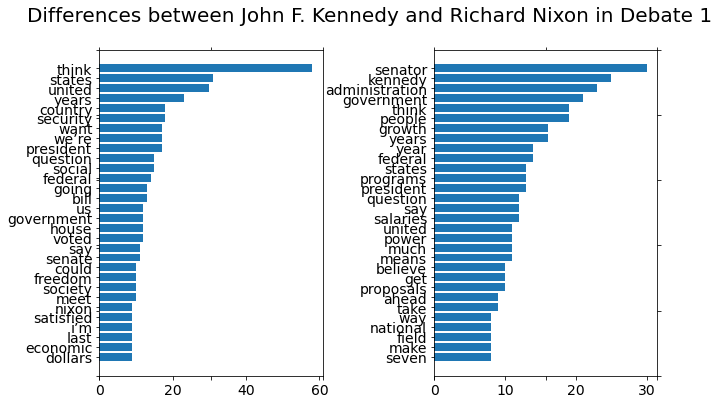

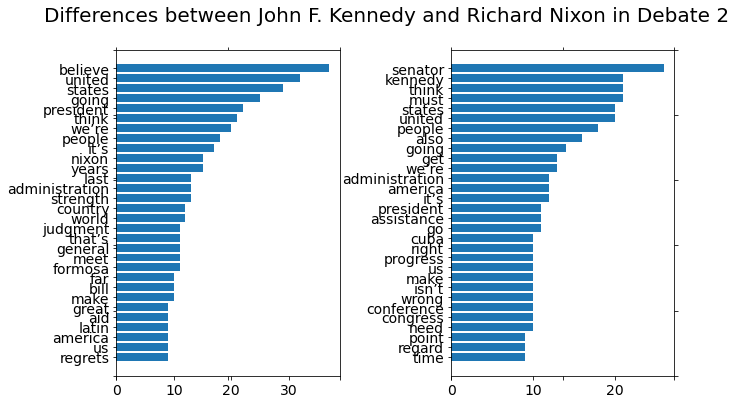

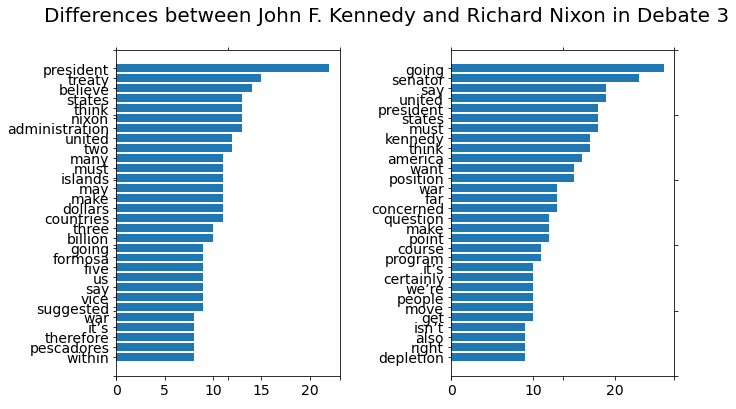

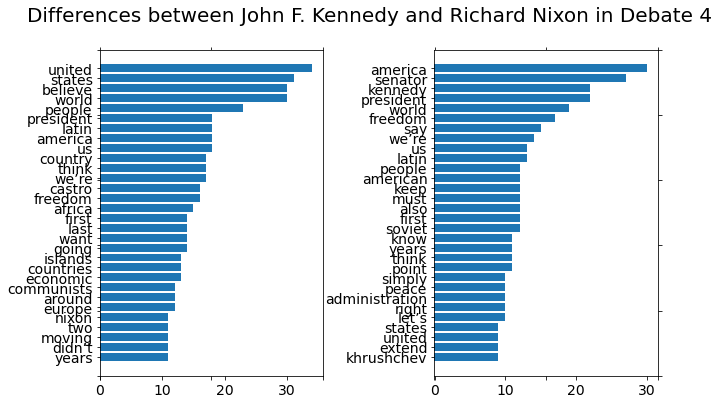

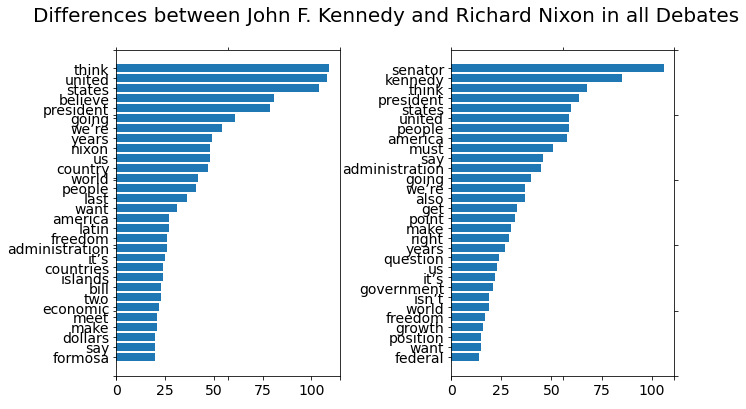

In [47]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (debateArr[0][0], debateArr[1][0], 'Differences between John F. Kennedy and Richard Nixon in Debate 1')
plotTwoLists (debateArr2[0][0], debateArr2[1][0], 'Differences between John F. Kennedy and Richard Nixon in Debate 2')
plotTwoLists (debateArr3[0][0], debateArr3[1][0], 'Differences between John F. Kennedy and Richard Nixon in Debate 3')
plotTwoLists (debateArr4[0][0], debateArr4[1][0], 'Differences between John F. Kennedy and Richard Nixon in Debate 4')
plotTwoLists (total_arr1[ 0:30 ] [::-1], total_arr2[ 0:30 ] [::-1], 'Differences between John F. Kennedy and Richard Nixon in all Debates')

<h1>Results</h1>
<ul>
    <li>It is often said that John F. Kennedy was able to win the election due to his strong performance in the debates.</li>
    <li>It does appear that Nixon talks about Kennedy more than Kennedy talked about Nixon throughout all of the debates. This could likely indicate that American citizens view talk about the issues more favorably than personal jabs between candidates.</li>
</ul>